In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy as astr
import math
import scipy as sp

In [224]:
data = pd.read_csv('actualData.csv', low_memory = False)
mag0 = data['mag_0'].astype(float)
mag1 = data['mag_1'].astype(float)
mag2 = data['mag_2'].astype(float)
z = data['z']
data['V'] = (((((1+z)**2)-1)/(((1+z)**2)+1)) * (3 * (10**5)))
data['distance'] = data['V']/(69.9)
data["Abs Mag 0"] = -(-mag0+((5*np.log10(data['distance']*(10**6)))) - 5)
data["Abs Mag 1"] = -(-mag1+((5*np.log10(data['distance']*(10**6)))) - 5)
data["Abs Mag 2"] = -(-mag2+((5*np.log10(data['distance']*(10**6)))) - 5)

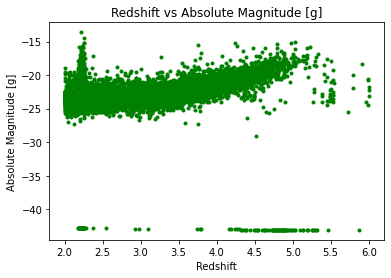

In [225]:
plt.plot(data['z'], data['Abs Mag 0'],'.',color = 'green')
plt.xlabel('Redshift')
plt.ylabel("Absolute Magnitude [g]")
plt.title('Redshift vs Absolute Magnitude [g]')
plt.show()

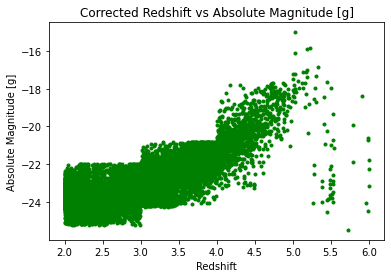

In [226]:
# Abs Mag 0 Stand Deviation
data['A'] = data['Abs Mag 0'].where(data['z'] <= 3.0)
data['B'] = data['Abs Mag 0'].where((data['z'] > 3) & (data['z'] <= 4))
data['C'] = data['Abs Mag 0'].where((data['z'] > 4) & (data['z'] <= 5))
data['D'] = data['Abs Mag 0'].where((data['z'] > 5) & (data['z'] <= 6))
data['E'] = data['Abs Mag 0'].where((data['z'] > 6) & (data['z'] <= 7))
a = data['A'].astype(float)
b = data['B'].astype(float)
c = data['C'].astype(float)
d = data['D'].astype(float)
e = data['E'].astype(float)
a = data['A']
b = data['B']
c = data['C']
d = data['D']
e = data['E']
data['a_shift'] = a.where((a <= (a.mean() + (2*a.std()))) & (a >= (a.mean() - (2*a.std()))))
data['b_shift'] = b.where((b <= (b.mean() + (2*b.std()))) & (b >= (b.mean() - (2*b.std()))))
data['c_shift'] = c.where((c <= (c.mean() + (2*c.std()))) & (c >= (c.mean() - (2*c.std()))))
data['d_shift'] = d.where((d <= (d.mean() + (2*d.std()))) & (d >= (d.mean() - (2*d.std()))))
data['e_shift'] = e.where((e <= (e.mean() + (2*e.std()))) & (e >= (e.mean() - (2*e.std()))))
a2 = data['a_shift']
b2 = data['b_shift']
c2 = data['c_shift']
d2 = data['d_shift']
e2 = data['e_shift']
data['a_shift2'] = a2.where((a2 <= (a2.mean() + (2*a2.std()))) & (a2 >= (a2.mean() - (2*a2.std()))))
data['b_shift2'] = b2.where((b2 <= (b2.mean() + (2*b2.std()))) & (b2 >= (b2.mean() - (2*b2.std()))))
data['c_shift2'] = c2.where((c2 <= (c2.mean() + (2*c2.std()))) & (c2 >= (c2.mean() - (2*c2.std()))))
data['d_shift2'] = d2.where((d2 <= (d2.mean() + (2*d2.std()))) & (d2 >= (d2.mean() - (2*d2.std()))))
data['e_shift2'] = e2.where((e2 <= (e2.mean() + (2*e2.std()))) & (e2 >= (e2.mean() - (2*e2.std()))))
plt.plot(data['z'], data['a_shift2'], '.',  color = 'green')
plt.plot(data['z'], data['b_shift2'], '.',  color = 'green')
plt.plot(data['z'], data['c_shift2'], '.', color = 'green')
plt.plot(data['z'], data['d_shift2'], '.',  color = 'green')
plt.plot(data['z'], data['e_shift2'], '.',  color = 'green')

plt.xlabel('Redshift')
plt.ylabel("Absolute Magnitude [g]")
plt.title('Corrected Redshift vs Absolute Magnitude [g]')

plt.show()

Statistics
Slope Formula for Line: y = -27.1129 + 1.4731x
------------------------------------------------------------
Standard Deviation 2 - 3:  0.814134554149073
Median Y for 2 - 3: -23.67796394680319
Mean Y for 2 - 3: -23.681910833146034
Median X for 2 - 3: 2.23906
Mean X for 2 - 3: 2.33102484017849
------------------------------------------------------------
Standard Deviation 3 - 4:  0.8619608870351997
Median Y for 3 - 4: -22.498350745888715
Mean Y for 3 - 4: -22.516759857576947
Median X for 3 - 4: 3.3257250000000003
Mean X for 3 - 4: 3.3946261232572876
------------------------------------------------------------
Standard Deviation 4 - 5:  1.402012563969903
Median Y for 4 - 5: -20.626922280027387
Mean Y for 4 - 5: -20.527825947073485
Median X for 4 - 5: 4.30516
Mean X for 4 - 5: 4.351021590720795
------------------------------------------------------------
Standard Deviation 5 - 6:  2.7238121047033106
Median Y for 5 - 6: -19.31309013153599
Mean Y for 5 - 6: -20.127003928408953
Med

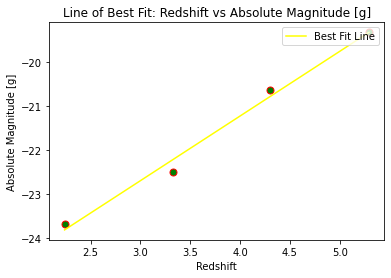

In [227]:
# plt.plot(data['z'], data['a_shift2'], '.')
# plt.plot(data['z'], data['b_shift2'], '.')
# plt.plot(data['z'], data['c_shift2'], '.')
# plt.plot(data['z'], data['d_shift2'], '.')
plt.plot(data['z'].where(data['z'] <= 3).median(), data['a_shift2'].median(), marker="o", markersize=7, markeredgecolor="red", markerfacecolor="green")
plt.plot(data['z'].where((data['z'] > 3) & (data['z'] <= 4)).median(), data['b_shift2'].median(), marker="o", markersize=7, markeredgecolor="red", markerfacecolor="green")
plt.plot(data['z'].where((data['z'] > 4) & (data['z'] <= 5)).median(), data['c_shift2'].median(), marker="o", markersize=7, markeredgecolor="red", markerfacecolor="green")
plt.plot(data['z'].where((data['z'] > 5) & (data['z'] <= 6)).median(), data['d_shift2'].median(), marker="o", markersize=7, markeredgecolor="red", markerfacecolor="green")

x = np.array([data['z'].where(data['z'] <= 3).median(), data['z'].where((data['z'] > 3) & (data['z'] <= 4)).median(), data['z'].where((data['z'] > 4) & (data['z'] <= 5)).median(), data['z'].where((data['z'] > 5) & (data['z'] <= 6)).median()])
y = np.array([data['a_shift2'].median(), data['b_shift2'].median(), data['c_shift2'].median(), data['d_shift2'].median()])

n, m = np.polyfit(x, y, 1)
plt.plot(x, n*x+m, color = 'yellow', label = "Best Fit Line")

plt.xlabel('Redshift')
plt.ylabel("Absolute Magnitude [g]")
plt.title('Line of Best Fit: Redshift vs Absolute Magnitude [g]')

plt.legend(loc = 'upper right')

print("Statistics")
print('Slope Formula for Line: y = ' + '{:.4f}'.format(m) + ' + {:.4f}'.format(n) + 'x')
print("------------------------------------------------------------")
print("Standard Deviation 2 - 3: ", a2.std())
print("Median Y for 2 - 3:", data['a_shift2'].median())
print("Mean Y for 2 - 3:", data['a_shift2'].mean())
print("Median X for 2 - 3:", data['z'].where(data['z'] <= 3).median())
print("Mean X for 2 - 3:", data['z'].where(data['z'] <= 3).mean())
print("------------------------------------------------------------")
print("Standard Deviation 3 - 4: ", b2.std())
print("Median Y for 3 - 4:", data['b_shift2'].median())
print("Mean Y for 3 - 4:", data['b_shift2'].mean())
print("Median X for 3 - 4:", data['z'].where((data['z'] > 3) & (data['z'] <= 4)).median())
print("Mean X for 3 - 4:", data['z'].where((data['z'] > 3) & (data['z'] <= 4)).mean())
print("------------------------------------------------------------")
print("Standard Deviation 4 - 5: ", c2.std())
print("Median Y for 4 - 5:", data['c_shift2'].median())
print("Mean Y for 4 - 5:", data['c_shift2'].mean())
print("Median X for 4 - 5:", data['z'].where((data['z'] > 4) & (data['z'] <= 5)).median())
print("Mean X for 4 - 5:", data['z'].where((data['z'] > 4) & (data['z'] <= 5)).mean())
print("------------------------------------------------------------")
print("Standard Deviation 5 - 6: ", d2.std())
print("Median Y for 5 - 6:", data['d_shift2'].median())
print("Mean Y for 5 - 6:", data['d_shift2'].mean())
print("Median X for 5 - 6:", data['z'].where((data['z'] > 5) & (data['z'] <= 6)).median())
print("Mean X for 5 - 6:", data['z'].where((data['z'] > 5) & (data['z'] <= 6)).mean())

plt.show()

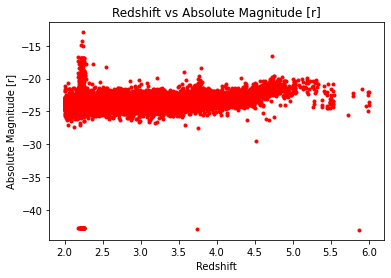

In [228]:
plt.plot(data['z'], data['Abs Mag 1'],'.',color = 'red')
plt.xlabel('Redshift')
plt.ylabel("Absolute Magnitude [r]")
plt.title('Redshift vs Absolute Magnitude [r]')
plt.show()

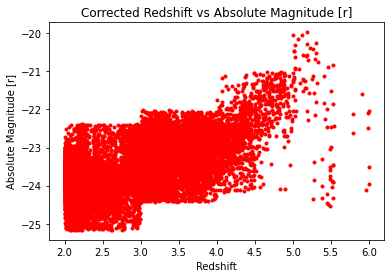

In [229]:
data['A'] = data['Abs Mag 1'].where(data['z'] <= 3.0)
data['B'] = data['Abs Mag 1'].where((data['z'] > 3) & (data['z'] <= 4))
data['C'] = data['Abs Mag 1'].where((data['z'] > 4) & (data['z'] <= 5))
data['D'] = data['Abs Mag 1'].where((data['z'] > 5) & (data['z'] <= 6))
data['E'] = data['Abs Mag 1'].where((data['z'] > 6) & (data['z'] <= 7))
# a = data['A'].astype(float)
# b = data['B'].astype(float)
# c = data['C'].astype(float)
# d = data['D'].astype(float)
# e = data['E'].astype(float)
a = data['A']
b = data['B']
c = data['C']
d = data['D']
e = data['E']
data['a_shift'] = a.where((a <= (a.mean() + (2*a.std()))) & (a >= (a.mean() - (2*a.std()))))
data['b_shift'] = b.where((b <= (b.mean() + (2*b.std()))) & (b >= (b.mean() - (2*b.std()))))
data['c_shift'] = c.where((c <= (c.mean() + (2*c.std()))) & (c >= (c.mean() - (2*c.std()))))
data['d_shift'] = d.where((d <= (d.mean() + (2*d.std()))) & (d >= (d.mean() - (2*d.std()))))
data['e_shift'] = e.where((e <= (e.mean() + (2*e.std()))) & (e >= (e.mean() - (2*e.std()))))
a2 = data['a_shift']
b2 = data['b_shift']
c2 = data['c_shift']
d2 = data['d_shift']
e2 = data['e_shift']
data['a_shift2'] = a2.where((a2 <= (a2.mean() + (2*a2.std()))) & (a2 >= (a2.mean() - (2*a2.std()))))
data['b_shift2'] = b2.where((b2 <= (b2.mean() + (2*b2.std()))) & (b2 >= (b2.mean() - (2*b2.std()))))
data['c_shift2'] = c2.where((c2 <= (c2.mean() + (2*c2.std()))) & (c2 >= (c2.mean() - (2*c2.std()))))
data['d_shift2'] = d2.where((d2 <= (d2.mean() + (2*d2.std()))) & (d2 >= (d2.mean() - (2*d2.std()))))
data['e_shift2'] = e2.where((e2 <= (e2.mean() + (2*e2.std()))) & (e2 >= (e2.mean() - (2*e2.std()))))
plt.plot(data['z'], data['a_shift2'], '.', color = 'red')
plt.plot(data['z'], data['b_shift2'], '.', color = 'red')
plt.plot(data['z'], data['c_shift2'], '.', color = 'red')
plt.plot(data['z'], data['d_shift2'], '.', color = 'red')
plt.plot(data['z'], data['e_shift2'], '.', color = 'red')
plt.xlabel('Redshift')
plt.ylabel("Absolute Magnitude [r]")
plt.title('Corrected Redshift vs Absolute Magnitude [r]')
plt.show()

Statistics
Slope Formula for Line: y = -25.4106 + 0.6907x
------------------------------------------------------------
Standard Deviation 2 - 3:  0.6935021027881751
Median Y for 2 - 3: -23.803183430022933
Mean Y for 2 - 3: -23.828821827657823
Median X for 2 - 3: 2.23906
Mean X for 2 - 3: 2.33102484017849
------------------------------------------------------------
Standard Deviation 3 - 4:  0.6028970206657505
Median Y for 3 - 4: -23.114016424528185
Mean Y for 3 - 4: -23.182141399595366
Median X for 3 - 4: 3.3257250000000003
Mean X for 3 - 4: 3.3946261232572876
------------------------------------------------------------
Standard Deviation 4 - 5:  0.7858335739938349
Median Y for 4 - 5: -22.62458673868742
Mean Y for 4 - 5: -22.603650167548132
Median X for 4 - 5: 4.30516
Mean X for 4 - 5: 4.351021590720795
------------------------------------------------------------
Standard Deviation 5 - 6:  1.3874203721998126
Median Y for 5 - 6: -21.62817984650602
Mean Y for 5 - 6: -21.97406493331585
Me

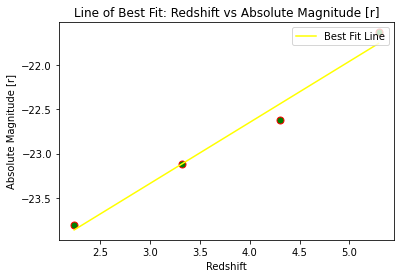

In [230]:
# plt.plot(data['z'], data['a_shift2'], '.')
# plt.plot(data['z'], data['b_shift2'], '.')
# plt.plot(data['z'], data['c_shift2'], '.')
# plt.plot(data['z'], data['d_shift2'], '.')
plt.plot(data['z'].where(data['z'] <= 3).median(), data['a_shift2'].median(), marker="o", markersize=7, markeredgecolor="red", markerfacecolor="green")
plt.plot(data['z'].where((data['z'] > 3) & (data['z'] <= 4)).median(), data['b_shift2'].median(), marker="o", markersize=7, markeredgecolor="red", markerfacecolor="green")
plt.plot(data['z'].where((data['z'] > 4) & (data['z'] <= 5)).median(), data['c_shift2'].median(), marker="o", markersize=7, markeredgecolor="red", markerfacecolor="green")
plt.plot(data['z'].where((data['z'] > 5) & (data['z'] <= 6)).median(), data['d_shift2'].median(), marker="o", markersize=7, markeredgecolor="red", markerfacecolor="green")

x = np.array([data['z'].where(data['z'] <= 3).median(), data['z'].where((data['z'] > 3) & (data['z'] <= 4)).median(), data['z'].where((data['z'] > 4) & (data['z'] <= 5)).median(), data['z'].where((data['z'] > 5) & (data['z'] <= 6)).median()])
y = np.array([data['a_shift2'].median(), data['b_shift2'].median(), data['c_shift2'].median(), data['d_shift2'].median()])

n, m = np.polyfit(x, y, 1)
plt.plot(x, n*x+m, color = 'yellow', label = "Best Fit Line")

plt.legend(loc = 'upper right')

plt.xlabel('Redshift')
plt.ylabel("Absolute Magnitude [r]")
plt.title('Line of Best Fit: Redshift vs Absolute Magnitude [r]')

print("Statistics")
print('Slope Formula for Line: y = ' + '{:.4f}'.format(m) + ' + {:.4f}'.format(n) + 'x')
print("------------------------------------------------------------")
print("Standard Deviation 2 - 3: ", a2.std())
print("Median Y for 2 - 3:", data['a_shift2'].median())
print("Mean Y for 2 - 3:", data['a_shift2'].mean())
print("Median X for 2 - 3:", data['z'].where(data['z'] <= 3).median())
print("Mean X for 2 - 3:", data['z'].where(data['z'] <= 3).mean())
print("------------------------------------------------------------")
print("Standard Deviation 3 - 4: ", b2.std())
print("Median Y for 3 - 4:", data['b_shift2'].median())
print("Mean Y for 3 - 4:", data['b_shift2'].mean())
print("Median X for 3 - 4:", data['z'].where((data['z'] > 3) & (data['z'] <= 4)).median())
print("Mean X for 3 - 4:", data['z'].where((data['z'] > 3) & (data['z'] <= 4)).mean())
print("------------------------------------------------------------")
print("Standard Deviation 4 - 5: ", c2.std())
print("Median Y for 4 - 5:", data['c_shift2'].median())
print("Mean Y for 4 - 5:", data['c_shift2'].mean())
print("Median X for 4 - 5:", data['z'].where((data['z'] > 4) & (data['z'] <= 5)).median())
print("Mean X for 4 - 5:", data['z'].where((data['z'] > 4) & (data['z'] <= 5)).mean())
print("------------------------------------------------------------")
print("Standard Deviation 5 - 6: ", d2.std())
print("Median Y for 5 - 6:", data['d_shift2'].median())
print("Mean Y for 5 - 6:", data['d_shift2'].mean())
print("Median X for 5 - 6:", data['z'].where((data['z'] > 5) & (data['z'] <= 6)).median())
print("Mean X for 5 - 6:", data['z'].where((data['z'] > 5) & (data['z'] <= 6)).mean())

plt.show()


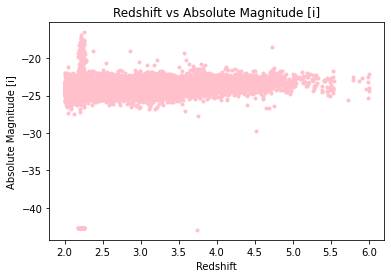

In [231]:
plt.plot(data['z'], data['Abs Mag 2'],'.',color = 'pink')
plt.xlabel('Redshift')
plt.ylabel("Absolute Magnitude [i]")
plt.title('Redshift vs Absolute Magnitude [i]')
plt.show()

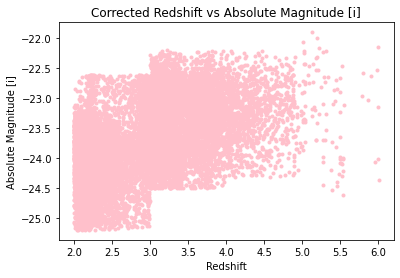

In [232]:
# Abs Mag 2 Stand Deviation
data['A'] = data['Abs Mag 2'].where(data['z'] <= 3.0)
data['B'] = data['Abs Mag 2'].where((data['z'] > 3) & (data['z'] <= 4))
data['C'] = data['Abs Mag 2'].where((data['z'] > 4) & (data['z'] <= 5))
data['D'] = data['Abs Mag 2'].where((data['z'] > 5) & (data['z'] <= 6))
data['E'] = data['Abs Mag 2'].where((data['z'] > 6) & (data['z'] <= 7))
# a = data['A'].astype(float)
# b = data['B'].astype(float)
# c = data['C'].astype(float)
# d = data['D'].astype(float)
# e = data['E'].astype(float)
a = data['A']
b = data['B']
c = data['C']
d = data['D']
e = data['E']
data['a_shift'] = a.where((a <= (a.mean() + (2*a.std()))) & (a >= (a.mean() - (2*a.std()))))
data['b_shift'] = b.where((b <= (b.mean() + (2*b.std()))) & (b >= (b.mean() - (2*b.std()))))
data['c_shift'] = c.where((c <= (c.mean() + (2*c.std()))) & (c >= (c.mean() - (2*c.std()))))
data['d_shift'] = d.where((d <= (d.mean() + (2*d.std()))) & (d >= (d.mean() - (2*d.std()))))
data['e_shift'] = e.where((e <= (e.mean() + (2*e.std()))) & (e >= (e.mean() - (2*e.std()))))
a2 = data['a_shift']
b2 = data['b_shift']
c2 = data['c_shift']
d2 = data['d_shift']
e2 = data['e_shift']
data['a_shift2'] = a2.where((a2 <= (a2.mean() + (2*a2.std()))) & (a2 >= (a2.mean() - (2*a2.std()))))
data['b_shift2'] = b2.where((b2 <= (b2.mean() + (2*b2.std()))) & (b2 >= (b2.mean() - (2*b2.std()))))
data['c_shift2'] = c2.where((c2 <= (c2.mean() + (2*c2.std()))) & (c2 >= (c2.mean() - (2*c2.std()))))
data['d_shift2'] = d2.where((d2 <= (d2.mean() + (2*d2.std()))) & (d2 >= (d2.mean() - (2*d2.std()))))
data['e_shift2'] = e2.where((e2 <= (e2.mean() + (2*e2.std()))) & (e2 >= (e2.mean() - (2*e2.std()))))
plt.plot(data['z'], data['a_shift2'], '.', color = 'pink')
plt.plot(data['z'], data['b_shift2'], '.', color = 'pink')
plt.plot(data['z'], data['c_shift2'], '.', color = 'pink')
plt.plot(data['z'], data['d_shift2'], '.', color = 'pink')
plt.plot(data['z'], data['e_shift2'], '.', color = 'pink')

plt.xlabel('Redshift')
plt.ylabel("Absolute Magnitude [i]")
plt.title('Corrected Redshift vs Absolute Magnitude [i]')

plt.show()

Statistics
Slope Formula for Line: y = -24.2495 + 0.2308x
------------------------------------------------------------
Standard Deviation 2 - 3:  0.6476172441210983
Median Y for 2 - 3: -23.898270767520877
Mean Y for 2 - 3: -23.934217874459264
Median X for 2 - 3: 2.23906
Mean X for 2 - 3: 2.33102484017849
------------------------------------------------------------
Standard Deviation 3 - 4:  0.577253428563217
Median Y for 3 - 4: -23.245747330102237
Mean Y for 3 - 4: -23.317451972091238
Median X for 3 - 4: 3.3257250000000003
Mean X for 3 - 4: 3.3946261232572876
------------------------------------------------------------
Standard Deviation 4 - 5:  0.534986900835647
Median Y for 4 - 5: -23.215165801738152
Mean Y for 4 - 5: -23.247547391709436
Median X for 4 - 5: 4.30516
Mean X for 4 - 5: 4.351021590720795
------------------------------------------------------------
Standard Deviation 5 - 6:  0.7373537284805041
Median Y for 5 - 6: -23.14003708730864
Mean Y for 5 - 6: -23.187403005072227
Me

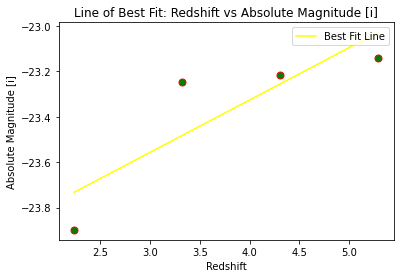

In [233]:
# plt.plot(data['z'], data['a_shift2'], '.')
# plt.plot(data['z'], data['b_shift2'], '.')
# plt.plot(data['z'], data['c_shift2'], '.')
# plt.plot(data['z'], data['d_shift2'], '.')
plt.plot(data['z'].where(data['z'] <= 3).median(), data['a_shift2'].median(), marker="o", markersize=7, markeredgecolor="red", markerfacecolor="green")
plt.plot(data['z'].where((data['z'] > 3) & (data['z'] <= 4)).median(), data['b_shift2'].median(), marker="o", markersize=7, markeredgecolor="red", markerfacecolor="green")
plt.plot(data['z'].where((data['z'] > 4) & (data['z'] <= 5)).median(), data['c_shift2'].median(), marker="o", markersize=7, markeredgecolor="red", markerfacecolor="green")
plt.plot(data['z'].where((data['z'] > 5) & (data['z'] <= 6)).median(), data['d_shift2'].median(), marker="o", markersize=7, markeredgecolor="red", markerfacecolor="green")

x = np.array([data['z'].where(data['z'] <= 3).median(), data['z'].where((data['z'] > 3) & (data['z'] <= 4)).median(), data['z'].where((data['z'] > 4) & (data['z'] <= 5)).median(), data['z'].where((data['z'] > 5) & (data['z'] <= 6)).median()])
y = np.array([data['a_shift2'].median(), data['b_shift2'].median(), data['c_shift2'].median(), data['d_shift2'].median()])

n, m = np.polyfit(x, y, 1)
plt.plot(x, n*x+m, color = 'yellow', label = "Best Fit Line")

plt.xlabel('Redshift')
plt.ylabel("Absolute Magnitude [i]")
plt.title('Line of Best Fit: Redshift vs Absolute Magnitude [i]')

plt.legend(loc = 'upper right')

print("Statistics")
print('Slope Formula for Line: y = ' + '{:.4f}'.format(m) + ' + {:.4f}'.format(n) + 'x')
print("------------------------------------------------------------")
print("Standard Deviation 2 - 3: ", a2.std())
print("Median Y for 2 - 3:", data['a_shift2'].median())
print("Mean Y for 2 - 3:", data['a_shift2'].mean())
print("Median X for 2 - 3:", data['z'].where(data['z'] <= 3).median())
print("Mean X for 2 - 3:", data['z'].where(data['z'] <= 3).mean())
print("------------------------------------------------------------")
print("Standard Deviation 3 - 4: ", b2.std())
print("Median Y for 3 - 4:", data['b_shift2'].median())
print("Mean Y for 3 - 4:", data['b_shift2'].mean())
print("Median X for 3 - 4:", data['z'].where((data['z'] > 3) & (data['z'] <= 4)).median())
print("Mean X for 3 - 4:", data['z'].where((data['z'] > 3) & (data['z'] <= 4)).mean())
print("------------------------------------------------------------")
print("Standard Deviation 4 - 5: ", c2.std())
print("Median Y for 4 - 5:", data['c_shift2'].median())
print("Mean Y for 4 - 5:", data['c_shift2'].mean())
print("Median X for 4 - 5:", data['z'].where((data['z'] > 4) & (data['z'] <= 5)).median())
print("Mean X for 4 - 5:", data['z'].where((data['z'] > 4) & (data['z'] <= 5)).mean())
print("------------------------------------------------------------")
print("Standard Deviation 5 - 6: ", d2.std())
print("Median Y for 5 - 6:", data['d_shift2'].median())
print("Mean Y for 5 - 6:", data['d_shift2'].mean())
print("Median X for 5 - 6:", data['z'].where((data['z'] > 5) & (data['z'] <= 6)).median())
print("Mean X for 5 - 6:", data['z'].where((data['z'] > 5) & (data['z'] <= 6)).mean())

plt.show()

In [234]:
# find trend in each, stand dev, and then best fit
# find the relationship between the magnitudes and get best fit lines

Text(0.5, 1.0, 'Photometric Magnitude [g] vs Absolute Magnitude [g]')

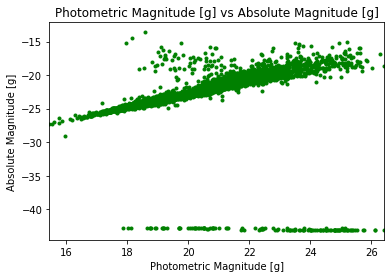

In [235]:
plt.plot(data['psfMag_g'], data['Abs Mag 0'],'.',color = 'green')
plt.xlim(data['psfMag_g'].min(), data['psfMag_g'].max())
plt.xlabel('Photometric Magnitude [g]')
plt.ylabel("Absolute Magnitude [g]")
plt.title('Photometric Magnitude [g] vs Absolute Magnitude [g]')

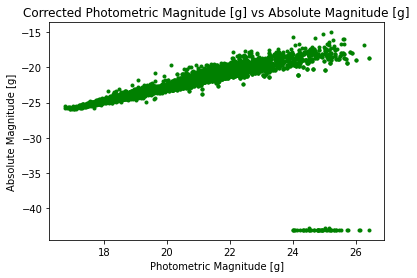

In [236]:
# Abs Mag 0 vs Psf Mag_g graph Stand Dev
data['A'] = data['Abs Mag 0'].where(data['psfMag_g'] <= 18)
data['B'] = data['Abs Mag 0'].where((data['psfMag_g'] > 18) & (data['z'] <= 20))
data['C'] = data['Abs Mag 0'].where((data['psfMag_g'] > 20) & (data['z'] <= 22))
data['D'] = data['Abs Mag 0'].where((data['psfMag_g'] > 22) & (data['z'] <= 24))
data['E'] = data['Abs Mag 0'].where((data['psfMag_g'] > 24))
# a = data['A'].astype(float)
# b = data['B'].astype(float)
# c = data['C'].astype(float)
# d = data['D'].astype(float)
# e = data['E'].astype(float)
a = data['A']
b = data['B']
c = data['C']
d = data['D']
e = data['E']
data['a_shift'] = a.where((a <= (a.mean() + (2*a.std()))) & (a >= (a.mean() - (2*a.std()))))
data['b_shift'] = b.where((b <= (b.mean() + (2*b.std()))) & (b >= (b.mean() - (2*b.std()))))
data['c_shift'] = c.where((c <= (c.mean() + (2*c.std()))) & (c >= (c.mean() - (2*c.std()))))
data['d_shift'] = d.where((d <= (d.mean() + (2*d.std()))) & (d >= (d.mean() - (2*d.std()))))
data['e_shift'] = e.where((e <= (e.mean() + (2*e.std()))) & (e >= (e.mean() - (2*e.std()))))
a2 = data['a_shift']
b2 = data['b_shift']
c2 = data['c_shift']
d2 = data['d_shift']
e2 = data['e_shift']
data['a_shift2'] = a2.where((a2 <= (a2.mean() + (2*a2.std()))) & (a2 >= (a2.mean() - (2*a2.std()))))
data['b_shift2'] = b2.where((b2 <= (b2.mean() + (2*b2.std()))) & (b2 >= (b2.mean() - (2*b2.std()))))
data['c_shift2'] = c2.where((c2 <= (c2.mean() + (2*c2.std()))) & (c2 >= (c2.mean() - (2*c2.std()))))
data['d_shift2'] = d2.where((d2 <= (d2.mean() + (2*d2.std()))) & (d2 >= (d2.mean() - (2*d2.std()))))
data['e_shift2'] = e2.where((e2 <= (e2.mean() + (2*e2.std()))) & (e2 >= (e2.mean() - (2*e2.std()))))
plt.plot(data['psfMag_g'], data['a_shift2'], '.', color = 'green')
plt.plot(data['psfMag_g'], data['b_shift2'], '.', color = 'green')
plt.plot(data['psfMag_g'], data['c_shift2'], '.', color = 'green')
plt.plot(data['psfMag_g'], data['d_shift2'], '.', color = 'green')
plt.plot(data['psfMag_g'], data['e_shift2'], '.', color = 'green')

plt.xlabel('Photometric Magnitude [g]')
plt.ylabel("Absolute Magnitude [g]")
plt.title('Corrected Photometric Magnitude [g] vs Absolute Magnitude [g]')

plt.show()

Statistics
y = -41.2101 + 0.9269x
------------------------------------------------------------
Standard Deviation <= 18:  0.40026207736200126
Median Y for <= 18: -25.032585043049473
Mean Y for <= 18: -25.079357522281605
Median X for <= 18: 17.73621
Mean X for <= 18: 17.612329847036328
------------------------------------------------------------
Standard Deviation 18 - 20:  1.150491144255887
Median Y for 18 - 20: -23.347589766927232
Mean Y for 18 - 20: -23.123940915027205
Median X for 18 - 20: 19.103795
Mean X for 18 - 20: 19.08040447191011
------------------------------------------------------------
Standard Deviation 20 - 22:  1.1213159901829899
Median Y for 20 - 22: -21.98885874340344
Mean Y for 20 - 22: -21.793515958407948
Median X for 20 - 22: 20.703617
Mean X for 20 - 22: 20.787512521058968
------------------------------------------------------------
Standard Deviation 22 - 24:  1.1074909669598432
Median Y for 22 - 24: -19.90993401907914
Mean Y for 22 - 24: -19.707314321718282
Med

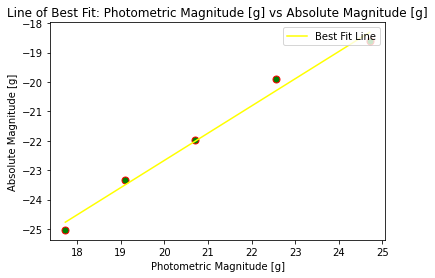

In [237]:
# plt.plot(data['psfMag_g'], data['a_shift2'], '.')
# plt.plot(data['psfMag_g'], data['b_shift2'], '.')
# plt.plot(data['psfMag_g'], data['c_shift2'], '.')
# plt.plot(data['psfMag_g'], data['d_shift2'], '.')
# plt.plot(data['psfMag_g'], data['e_shift2'], '.')
plt.plot(data['psfMag_g'].where(data['psfMag_g'] <= 18).median(), data['a_shift2'].median(), marker="o", markersize=7, markeredgecolor="red", markerfacecolor="green")
plt.plot(data['psfMag_g'].where((data['psfMag_g'] > 18) & (data['psfMag_g'] <= 20)).median(), data['b_shift2'].median(), marker="o", markersize=7, markeredgecolor="red", markerfacecolor="green")
plt.plot(data['psfMag_g'].where((data['psfMag_g'] > 20) & (data['psfMag_g'] <= 22)).median(), data['c_shift2'].median(), marker="o", markersize=7, markeredgecolor="red", markerfacecolor="green")
plt.plot(data['psfMag_g'].where((data['psfMag_g'] > 22) & (data['psfMag_g'] <= 24)).median(), data['d_shift2'].median(), marker="o", markersize=7, markeredgecolor="red", markerfacecolor="green")
plt.plot(data['psfMag_g'].where((data['psfMag_g'] > 24)).median(), data['e_shift2'].median(), marker="o", markersize=7, markeredgecolor="red", markerfacecolor="green")

x = np.array([data['psfMag_g'].where(data['psfMag_g'] <= 18).median(), data['psfMag_g'].where((data['psfMag_g'] > 18) & (data['psfMag_g'] <= 20)).median(), data['psfMag_g'].where((data['psfMag_g'] > 20) & (data['psfMag_g'] <= 22)).median(), data['psfMag_g'].where((data['psfMag_g'] > 22) & (data['psfMag_g'] <= 24)).median(), data['psfMag_g'].where((data['psfMag_g'] > 24)).median()])
y = np.array([data['a_shift2'].median(), data['b_shift2'].median(), data['c_shift2'].median(), data['d_shift2'].median(), data['e_shift2'].median()])

n, m = np.polyfit(x, y, 1)
plt.plot(x, n*x+m, color = 'yellow', label = "Best Fit Line")


plt.legend(loc = 'upper right')

plt.xlabel('Photometric Magnitude [g]')
plt.ylabel("Absolute Magnitude [g]")
plt.title('Line of Best Fit: Photometric Magnitude [g] vs Absolute Magnitude [g]')

print("Statistics")
print('y = ' + '{:.4f}'.format(m) + ' + {:.4f}'.format(n) + 'x')
print("------------------------------------------------------------")
print("Standard Deviation <= 18: ", a2.std())
print("Median Y for <= 18:", data['a_shift2'].median())
print("Mean Y for <= 18:", data['a_shift2'].mean())
print("Median X for <= 18:", data['psfMag_g'].where(data['psfMag_g'] <= 18).median())
print("Mean X for <= 18:", data['psfMag_g'].where(data['psfMag_g'] <= 18).mean())
print("------------------------------------------------------------")
print("Standard Deviation 18 - 20: ", b2.std())
print("Median Y for 18 - 20:", data['b_shift2'].median())
print("Mean Y for 18 - 20:", data['b_shift2'].mean())
print("Median X for 18 - 20:", data['psfMag_g'].where((data['psfMag_g'] > 18) & (data['psfMag_g'] <= 20)).median())
print("Mean X for 18 - 20:", data['psfMag_g'].where((data['psfMag_g'] > 18) & (data['psfMag_g'] <= 20)).mean())
print("------------------------------------------------------------")
print("Standard Deviation 20 - 22: ", c2.std())
print("Median Y for 20 - 22:", data['c_shift2'].median())
print("Mean Y for 20 - 22:", data['c_shift2'].mean())
print("Median X for 20 - 22:", data['psfMag_g'].where((data['psfMag_g'] > 20) & (data['psfMag_g'] <= 22)).median())
print("Mean X for 20 - 22:", data['psfMag_g'].where((data['psfMag_g'] > 20) & (data['psfMag_g'] <= 22)).mean())
print("------------------------------------------------------------")
print("Standard Deviation 22 - 24: ", d2.std())
print("Median Y for 22 - 24:", data['d_shift2'].median())
print("Mean Y for 22 - 24:", data['d_shift2'].mean())
print("Median X for 22 - 24:", data['psfMag_g'].where((data['psfMag_g'] > 22) & (data['psfMag_g'] <= 24)).median())
print("Mean X for 22 - 24:", data['psfMag_g'].where((data['psfMag_g'] > 22) & (data['psfMag_g'] <= 24)).mean())
print("------------------------------------------------------------")
print("Standard Deviation > 24: ", e2.std())
print("Median Y for > 24:", data['e_shift2'].median())
print("Mean Y for > 24:", data['e_shift2'].mean())
print("Median X for > 24:", data['psfMag_g'].where(data['psfMag_g'] > 24).median())
print("Mean X for > 24:", data['psfMag_g'].where(data['psfMag_g'] > 24).mean())


plt.show()

Text(0.5, 1.0, 'Photometric Magnitude [r] vs Absolute Magnitude [r]')

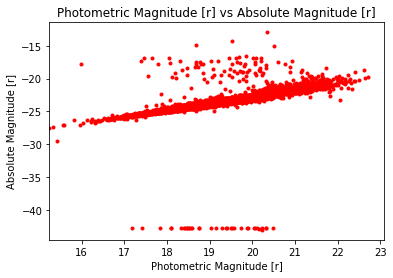

In [238]:
plt.plot(data['psfMag_r'], data['Abs Mag 1'],'.',color = 'red')
plt.xlim(data['psfMag_r'].min())
plt.xlabel('Photometric Magnitude [r]')
plt.ylabel("Absolute Magnitude [r]")
plt.title('Photometric Magnitude [r] vs Absolute Magnitude [r]')

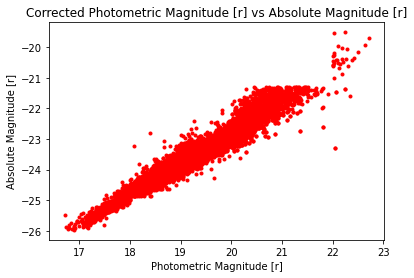

In [239]:
# Abs Mag 1 vs Psf Mag_r graph Stand Dev
data['A'] = data['Abs Mag 1'].where(data['psfMag_r'] <= 18)
data['B'] = data['Abs Mag 1'].where((data['psfMag_r'] > 18) & (data['z'] <= 20))
data['C'] = data['Abs Mag 1'].where((data['psfMag_r'] > 20) & (data['z'] <= 22))
data['D'] = data['Abs Mag 1'].where((data['psfMag_r'] > 22) & (data['z'] <= 24))
# a = data['A'].astype(float)
# b = data['B'].astype(float)
# c = data['C'].astype(float)
# d = data['D'].astype(float)
# e = data['E'].astype(float)
a = data['A']
b = data['B']
c = data['C']
d = data['D']
data['a_shift'] = a.where((a <= (a.mean() + (2*a.std()))) & (a >= (a.mean() - (2*a.std()))))
data['b_shift'] = b.where((b <= (b.mean() + (2*b.std()))) & (b >= (b.mean() - (2*b.std()))))
data['c_shift'] = c.where((c <= (c.mean() + (2*c.std()))) & (c >= (c.mean() - (2*c.std()))))
data['d_shift'] = d.where((d <= (d.mean() + (2*d.std()))) & (d >= (d.mean() - (2*d.std()))))
a2 = data['a_shift']
b2 = data['b_shift']
c2 = data['c_shift']
d2 = data['d_shift']
data['a_shift2'] = a2.where((a2 <= (a2.mean() + (2*a2.std()))) & (a2 >= (a2.mean() - (2*a2.std()))))
data['b_shift2'] = b2.where((b2 <= (b2.mean() + (2*b2.std()))) & (b2 >= (b2.mean() - (2*b2.std()))))
data['c_shift2'] = c2.where((c2 <= (c2.mean() + (2*c2.std()))) & (c2 >= (c2.mean() - (2*c2.std()))))
data['d_shift2'] = d2.where((d2 <= (d2.mean() + (2*d2.std()))) & (d2 >= (d2.mean() - (2*d2.std()))))
plt.plot(data['psfMag_r'], data['a_shift2'], '.', color = 'red')
plt.plot(data['psfMag_r'], data['b_shift2'], '.', color = 'red')
plt.plot(data['psfMag_r'], data['c_shift2'], '.', color = 'red')
plt.plot(data['psfMag_r'], data['d_shift2'], '.', color = 'red')

plt.xlabel('Photometric Magnitude [r]')
plt.ylabel("Absolute Magnitude [r]")
plt.title('Corrected Photometric Magnitude [r] vs Absolute Magnitude [r]')

plt.show()

Statistics
y = -43.4972 + 1.0395x
------------------------------------------------------------
Standard Deviation <= 18:  0.4153041485300714
Median Y for <= 18: -25.063946262824988
Mean Y for <= 18: -25.107519369055126
Median X for <= 18: 17.7328465
Mean X for <= 18: 17.606760708229427
------------------------------------------------------------
Standard Deviation 18 - 20:  0.7042562111399463
Median Y for 18 - 20: -23.589466371554295
Mean Y for 18 - 20: -23.519251832649214
Median X for 18 - 20: 19.059493
Mean X for 18 - 20: 19.063481037853517
------------------------------------------------------------
Standard Deviation 20 - 22:  0.5477869041331511
Median Y for 20 - 22: -22.560687574197132
Mean Y for 20 - 22: -22.46644825264919
Median X for 20 - 22: 20.293823500000002
Mean X for 20 - 22: 20.402585942288304
------------------------------------------------------------
Standard Deviation 22 - 24:  0.5334108059965866
Median Y for 22 - 24: -20.41060634887929
Mean Y for 22 - 24: -20.3944914

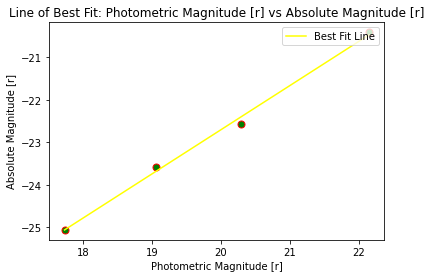

In [240]:
# plt.plot(data['psfMag_r'], data['a_shift2'], '.')
# plt.plot(data['psfMag_r'], data['b_shift2'], '.')
# plt.plot(data['psfMag_r'], data['c_shift2'], '.')
# plt.plot(data['psfMag_r'], data['d_shift2'], '.')
plt.plot(data['psfMag_r'].where(data['psfMag_r'] <= 18).median(), data['a_shift2'].median(), marker="o", markersize=7, markeredgecolor="red", markerfacecolor="green")
plt.plot(data['psfMag_r'].where((data['psfMag_r'] > 18) & (data['psfMag_r'] <= 20)).median(), data['b_shift2'].median(), marker="o", markersize=7, markeredgecolor="red", markerfacecolor="green")
plt.plot(data['psfMag_r'].where((data['psfMag_r'] > 20) & (data['psfMag_r'] <= 22)).median(), data['c_shift2'].median(), marker="o", markersize=7, markeredgecolor="red", markerfacecolor="green")
plt.plot(data['psfMag_r'].where((data['psfMag_r'] > 22) & (data['psfMag_r'] <= 24)).median(), data['d_shift2'].median(), marker="o", markersize=7, markeredgecolor="red", markerfacecolor="green")

x = np.array([data['psfMag_r'].where(data['psfMag_r'] <= 18).median(), data['psfMag_r'].where((data['psfMag_r'] > 18) & (data['psfMag_r'] <= 20)).median(), data['psfMag_r'].where((data['psfMag_r'] > 20) & (data['psfMag_r'] <= 22)).median(), data['psfMag_r'].where((data['psfMag_r'] > 22) & (data['psfMag_r'] <= 24)).median()])
y = np.array([data['a_shift2'].median(), data['b_shift2'].median(), data['c_shift2'].median(), data['d_shift2'].median()])

n, m = np.polyfit(x, y, 1)
plt.plot(x, n*x+m, color = 'yellow', label = "Best Fit Line")

plt.xlabel('Photometric Magnitude [r]')
plt.ylabel("Absolute Magnitude [r]")
plt.title('Line of Best Fit: Photometric Magnitude [r] vs Absolute Magnitude [r]')

plt.legend(loc = 'upper right')

print("Statistics")
print('y = ' + '{:.4f}'.format(m) + ' + {:.4f}'.format(n) + 'x')
print("------------------------------------------------------------")
print("Standard Deviation <= 18: ", a2.std())
print("Median Y for <= 18:", data['a_shift2'].median())
print("Mean Y for <= 18:", data['a_shift2'].mean())
print("Median X for <= 18:", data['psfMag_r'].where(data['psfMag_r'] <= 18).median())
print("Mean X for <= 18:", data['psfMag_r'].where(data['psfMag_r'] <= 18).mean())
print("------------------------------------------------------------")
print("Standard Deviation 18 - 20: ", b2.std())
print("Median Y for 18 - 20:", data['b_shift2'].median())
print("Mean Y for 18 - 20:", data['b_shift2'].mean())
print("Median X for 18 - 20:", data['psfMag_r'].where((data['psfMag_r'] > 18) & (data['psfMag_r'] <= 20)).median())
print("Mean X for 18 - 20:", data['psfMag_r'].where((data['psfMag_r'] > 18) & (data['psfMag_r'] <= 20)).mean())
print("------------------------------------------------------------")
print("Standard Deviation 20 - 22: ", c2.std())
print("Median Y for 20 - 22:", data['c_shift2'].median())
print("Mean Y for 20 - 22:", data['c_shift2'].mean())
print("Median X for 20 - 22:", data['psfMag_r'].where((data['psfMag_r'] > 20) & (data['psfMag_r'] <= 22)).median())
print("Mean X for 20 - 22:", data['psfMag_r'].where((data['psfMag_r'] > 20) & (data['psfMag_r'] <= 22)).mean())
print("------------------------------------------------------------")
print("Standard Deviation 22 - 24: ", d2.std())
print("Median Y for 22 - 24:", data['d_shift2'].median())
print("Mean Y for 22 - 24:", data['d_shift2'].mean())
print("Median X for 22 - 24:", data['psfMag_r'].where((data['psfMag_r'] > 22) & (data['psfMag_r'] <= 24)).median())
print("Mean X for 22 - 24:", data['psfMag_r'].where((data['psfMag_r'] > 22) & (data['psfMag_r'] <= 24)).mean())

plt.show()

Text(0.5, 1.0, 'Photometric Magnitude [i] vs Absolute Magnitude [i]')

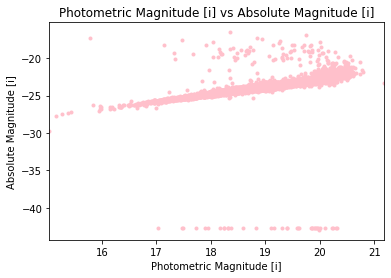

In [241]:
plt.plot(data['psfMag_i'], data['Abs Mag 2'],'.',color = 'pink')
plt.xlim(data['psfMag_i'].min(), data['psfMag_i'].max())
plt.xlabel('Photometric Magnitude [i]')
plt.ylabel("Absolute Magnitude [i]")
plt.title('Photometric Magnitude [i] vs Absolute Magnitude [i]')

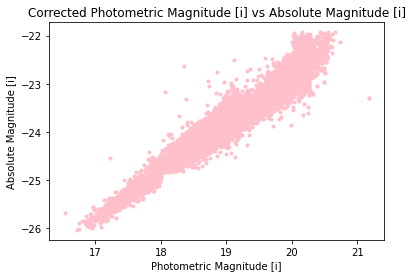

In [242]:
# Abs Mag 2 vs Psf Mag_i graph Stand Dev
data['A'] = data['Abs Mag 2'].where(data['psfMag_i'] <= 18)
data['B'] = data['Abs Mag 2'].where((data['psfMag_i'] > 18) & (data['z'] <= 20))
data['C'] = data['Abs Mag 2'].where((data['psfMag_i'] > 20))
# a = data['A'].astype(float)
# b = data['B'].astype(float)
# c = data['C'].astype(float)
# d = data['D'].astype(float)
# e = data['E'].astype(float)
a = data['A']
b = data['B']
c = data['C']
data['a_shift'] = a.where((a <= (a.mean() + (2*a.std()))) & (a >= (a.mean() - (2*a.std()))))
data['b_shift'] = b.where((b <= (b.mean() + (2*b.std()))) & (b >= (b.mean() - (2*b.std()))))
data['c_shift'] = c.where((c <= (c.mean() + (2*c.std()))) & (c >= (c.mean() - (2*c.std()))))
a2 = data['a_shift']
b2 = data['b_shift']
c2 = data['c_shift']
data['a_shift2'] = a2.where((a2 <= (a2.mean() + (2*a2.std()))) & (a2 >= (a2.mean() - (2*a2.std()))))
data['b_shift2'] = b2.where((b2 <= (b2.mean() + (2*b2.std()))) & (b2 >= (b2.mean() - (2*b2.std()))))
data['c_shift2'] = c2.where((c2 <= (c2.mean() + (2*c2.std()))) & (c2 >= (c2.mean() - (2*c2.std()))))
plt.plot(data['psfMag_i'], data['a_shift2'], '.', color = 'pink')
plt.plot(data['psfMag_i'], data['b_shift2'], '.', color = 'pink')
plt.plot(data['psfMag_i'], data['c_shift2'], '.', color = 'pink')

plt.xlabel('Photometric Magnitude [i]')
plt.ylabel("Absolute Magnitude [i]")
plt.title('Corrected Photometric Magnitude [i] vs Absolute Magnitude [i]')

plt.show()

Statistics
y = -40.8997 + 0.8979x
------------------------------------------------------------
Standard Deviation <= 18:  0.4247630634394611
Median Y for <= 18: -25.06706211572013
Mean Y for <= 18: -25.12936135550784
Median X for <= 18: 17.7125005
Mean X for <= 18: 17.58701458801498
------------------------------------------------------------
Standard Deviation 18 - 20:  0.6103185832706114
Median Y for 18 - 20: -23.6973494873781
Mean Y for 18 - 20: -23.6398012546649
Median X for 18 - 20: 19.0015685
Mean X for 18 - 20: 19.013978830714382
------------------------------------------------------------
Standard Deviation 20 - 22:  0.34938198444759905
Median Y for 20 - 22: -22.706817900475663
Mean Y for 20 - 22: -22.6756704428437
Median X for 20 - 22: 20.070744
Mean X for 20 - 22: 20.031038846365227


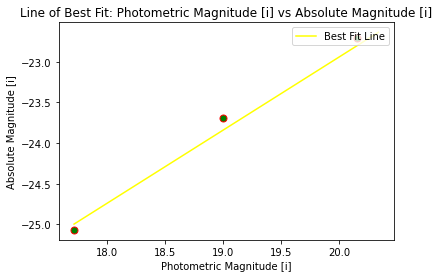

In [243]:
# plt.plot(data['psfMag_i'], data['a_shift2'], '.')
# plt.plot(data['psfMag_i'], data['b_shift2'], '.')
# plt.plot(data['psfMag_i'], data['c_shift2'], '.')
plt.plot(data['psfMag_i'].where(data['psfMag_i'] <= 18).median(), data['a_shift2'].median(), marker="o", markersize=7, markeredgecolor="red", markerfacecolor="green")
plt.plot(data['psfMag_i'].where((data['psfMag_i'] > 18) & (data['psfMag_i'] <= 20)).median(), data['b_shift2'].median(), marker="o", markersize=7, markeredgecolor="red", markerfacecolor="green")
plt.plot(data['psfMag_i'].where((data['psfMag_i'] > 20)).median(), data['c_shift2'].median(), marker="o", markersize=7, markeredgecolor="red", markerfacecolor="green")

x = np.array([data['psfMag_i'].where(data['psfMag_i'] <= 18).median(), data['psfMag_i'].where((data['psfMag_i'] > 18) & (data['psfMag_i'] <= 20)).median(), data['psfMag_r'].where((data['psfMag_i'] > 20)).median()])
y = np.array([data['a_shift2'].median(), data['b_shift2'].median(), data['c_shift2'].median()])

n, m = np.polyfit(x, y, 1)
plt.plot(x, n*x+m, color = 'yellow', label = "Best Fit Line")

plt.xlabel('Photometric Magnitude [i]')
plt.ylabel("Absolute Magnitude [i]")
plt.title('Line of Best Fit: Photometric Magnitude [i] vs Absolute Magnitude [i]')

plt.legend(loc = 'upper right')

print("Statistics")
print('y = ' + '{:.4f}'.format(m) + ' + {:.4f}'.format(n) + 'x')
print("------------------------------------------------------------")
print("Standard Deviation <= 18: ", a2.std())
print("Median Y for <= 18:", data['a_shift2'].median())
print("Mean Y for <= 18:", data['a_shift2'].mean())
print("Median X for <= 18:", data['psfMag_i'].where(data['psfMag_i'] <= 18).median())
print("Mean X for <= 18:", data['psfMag_i'].where(data['psfMag_i'] <= 18).mean())
print("------------------------------------------------------------")
print("Standard Deviation 18 - 20: ", b2.std())
print("Median Y for 18 - 20:", data['b_shift2'].median())
print("Mean Y for 18 - 20:", data['b_shift2'].mean())
print("Median X for 18 - 20:", data['psfMag_i'].where((data['psfMag_i'] > 18) & (data['psfMag_i'] <= 20)).median())
print("Mean X for 18 - 20:", data['psfMag_i'].where((data['psfMag_r'] > 18) & (data['psfMag_i'] <= 20)).mean())
print("------------------------------------------------------------")
print("Standard Deviation 20 - 22: ", c2.std())
print("Median Y for 20 - 22:", data['c_shift2'].median())
print("Mean Y for 20 - 22:", data['c_shift2'].mean())
print("Median X for 20 - 22:", data['psfMag_i'].where((data['psfMag_r'] > 20) & (data['psfMag_i'] <= 22)).median())
print("Mean X for 20 - 22:", data['psfMag_i'].where((data['psfMag_r'] > 20) & (data['psfMag_i'] <= 22)).mean())

plt.show()